# EDA Assignment On Haberman Dataset

## About Haberman Dataset


Haberman dataset contains cases from a study that was conducted between 1958 and 1970 at the university of chicago's billing hospital on the survival of patients who had undergone surgery for breast cancer

Attributes/features
1.Age of patient at the time of operation(numerical)
2.patient's year of opeartion (numerical)
3.number of auxillary nodes detected (numerical)
4.survival status (class attribute,nuemrical)
    1: patient survived 5 years or longer,
    2: patient died within 5 years

reference : https://www.kaggle.com/gilsousa/habermans-survival-data-set

## Domain Knowledge

(Q) : what are auxillary nodes in a breast cancer

(A) : refer --> https://www.medicalnewstoday.com/articles/319713

## Objective

our object is to detect if a new patient surives the breast cancer after the surgery for more than 5 years or not by performing EDA.

# Importing Necessary Libraries  and haberman_dataset

In [25]:
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# load the dataset into pandas dataframe
breast_cancer = pd.read_csv('haberman.csv')
#ensure the dataset the loaded properly by printing first few rows
breast_cancer.head(10) 

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


#  Overview of the dataset

In [26]:
# what is the size of the dataset?
breast_cancer.shape

(306, 4)


*   There are 306 patient's records(rows)
*   There are four attributes for each patient(columns)



In [27]:
# what are the four columns
print('The columns of the datasets are :',list(breast_cancer.columns),'\n')

# what are the datatypes of the four columns
print('The datatypes of each column:\n')
breast_cancer.dtypes

The columns of the datasets are : ['age', 'year', 'nodes', 'status'] 

The datatypes of each column:



age       int64
year      int64
nodes     int64
status    int64
dtype: object

* There are four columns
* status feature is class variable
* All the columns are integer datatype



In [28]:
# check for any null vaues in the dataset
breast_cancer.isnull().values.any()    # refer: https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

False

There are no null values, that's sweet let's move on for further analysis

In [29]:
# check for  number of classes and balanced/imbalanced dataset
print('The different classes of the target feature are:',breast_cancer['status'].unique())
breast_cancer['status'].value_counts()

The different classes of the target feature are: [1 2]


1    225
2     81
Name: status, dtype: int64

* There are two classes in the status feature

* The above result shows that dataset is Imbalanced as there are large bunch of patients who survived for 5 or longer years when compared to people who died within 5 years

*  I guess making the dataset a balanced dataset will be covered later in the course


# descriptive stats

In [30]:
breast_cancer.describe(include='all')

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


* **Age and year are mostly guassian distributed since their respective means are almost equal to their median (50th percentile)**

* **Nodes are rightly skewed** since out of 306 patients nearly 50% of the patients are having 0 or 1 axillary nodes.i.e (mean > median).This also shows that the  **node's mean is corrupted by only a few patients who have severe number of axillary nodes**

* for year column since std is also less along with mean roughly equal to mean, this suggests more accurate guassian distribution,hence **we can say that in the  year 1962 -1963 ,there were many opearations done**

# Visualiazations

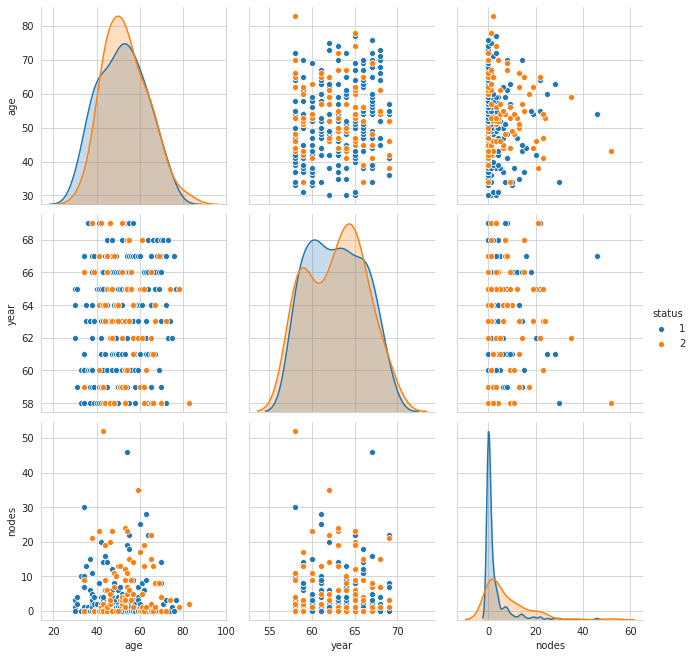

In [8]:
# pairplot to see if there are good combinations of features to seperate the patients based on status
sns.set_style('whitegrid')
sns.pairplot(breast_cancer,hue='status',height=3)
plt.show()

observations:

* Its very hard to seperate the patients on status on using any of the above plots.
* need to look at depth of each feature varying with status

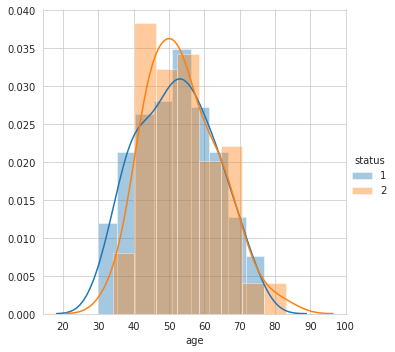

In [9]:
#does age help us to separate patients based on status ?
sns.FacetGrid(breast_cancer,hue='status',height=5).map(sns.distplot,'age').add_legend()

* patients age clearly doesn't help us to well seperate the patients based on status

* when people are between 20-40 age there is slightly higher chance that the patient may survive

* when people are between 40-60 , the chances to survive more than 5 years is  less when compared to death within 5 years

* after age 60, the chances of survival also depends on other health aspects of the patient

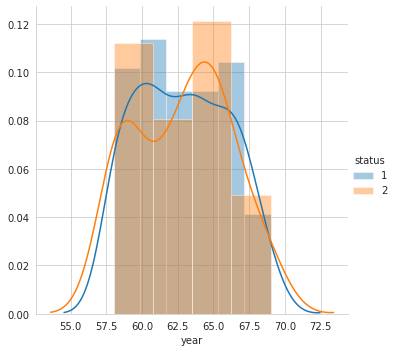

In [10]:
#does year help us to separate patients on status?
sns.FacetGrid(breast_cancer,hue='status',height=5).map(sns.distplot,'year').add_legend()

* as expected,the opearation year of the patients doesn't inform us anything about the information to seperate patients based on status


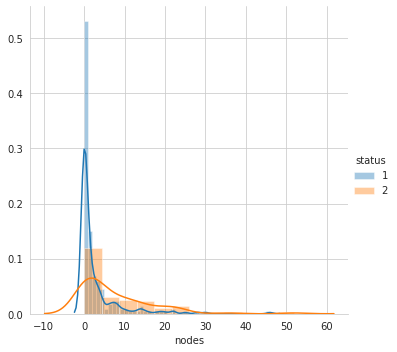

In [11]:
# does number of nodes help us to seperate patients based on status?
sns.FacetGrid(breast_cancer,hue='status',height=5).map(sns.distplot,'nodes').add_legend()

* patients with 0-5(approx) nodes have a much greater probablity to survive for more than 5years

* As expected patients with more nodes are slightly higher probable to death within 5 years than compared with patients who survived longer years

Note: Among all the indepedent features analysis with respect to patient's survival status,I feel number of axillary nodes are much informative regarding classifying the patients based on survival status.It is clear when we compare the above 3 graphs

In [12]:
# seperating the haberman data based on the status feature
breast_cancer_survived = breast_cancer.loc[breast_cancer["status"] == 1]
breast_cancer_death = breast_cancer.loc[breast_cancer["status"] == 2]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6 31.2 33.8
 36.4 39.  41.6 44.2 46.8 49.4 52. ]


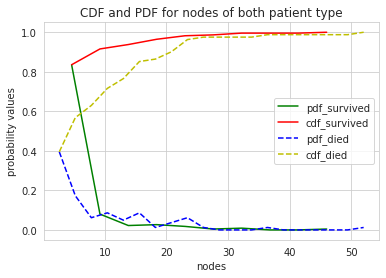

In [13]:
# Analyzing the pdf and cdf of nodes with respect to patients status
bin_counts, bin_edges = np.histogram(breast_cancer_survived['nodes'], bins=10, 
                                 density = True)
pdf = bin_counts/(sum(bin_counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, 'g-',label='pdf_survived')
plt.plot(bin_edges[1:], cdf,'r-',label='cdf_survived')


bin_counts, bin_edges = np.histogram(breast_cancer_death['nodes'], bins=20, 
                                 density = True)
pdf = bin_counts/(sum(bin_counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'b--',label='pdf_died')
plt.plot(bin_edges[1:], cdf,'y--',label='cdf_died')
plt.xlabel('nodes',)
plt.ylabel('probability values')
plt.title('CDF and PDF for nodes of both patient type')
plt.legend()

plt.show()


* The probablity of survival of a patient is higher when the axillary node count is roughly between 0-25,after reaching node counts of 25 or higher,the chances of survival purely depends on the health conditions

* There are about 80% of patients who survived  and  have nodes <= 5

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


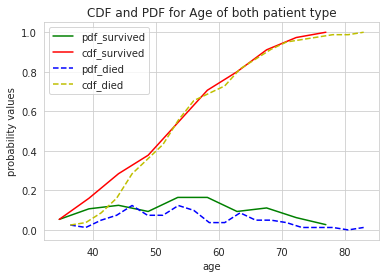

In [14]:
# analyzing the pdf and cdf of age with respect to patients status
bin_counts, bin_edges = np.histogram(breast_cancer_survived['age'], bins=10, 
                                 density = True)
pdf = bin_counts/(sum(bin_counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, 'g-',label='pdf_survived')
plt.plot(bin_edges[1:], cdf,'r-',label='cdf_survived')


bin_counts, bin_edges = np.histogram(breast_cancer_death['age'], bins=20, 
                                 density = True)
pdf = bin_counts/(sum(bin_counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'b--',label='pdf_died')
plt.plot(bin_edges[1:], cdf,'y--',label='cdf_died')
plt.xlabel('age')
plt.ylabel('probability values')
plt.title('CDF and PDF for Age of both patient type')
plt.legend()

plt.show()

* There is roughly 20% extra chance for a patient to survive if the age is below 45

* above 45 age,survival may purely depend on other health aspects of the patient

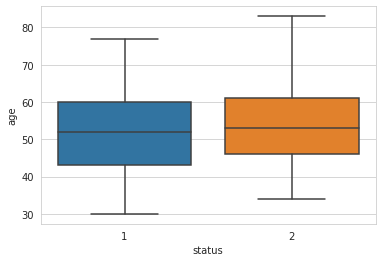

In [15]:
# boxplot of status and age
sns.boxplot(x='status',y='age',data=breast_cancer)
plt.show()

* 25th percentile of status=2 and status=1 suggests that a new patient with age below 43(roughly) is slightly likely to be survived

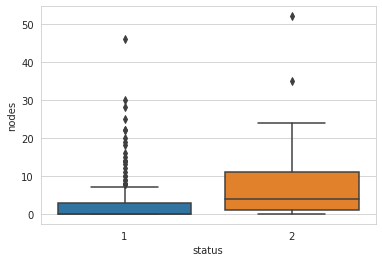

In [44]:
# boxplot of status and nodes
sns.boxplot(x='status',y='nodes',data=breast_cancer)
plt.show()

* there are more patients who survived with greater number of nodes too,but since the data is imbalance we can't accuractely tell the above fact

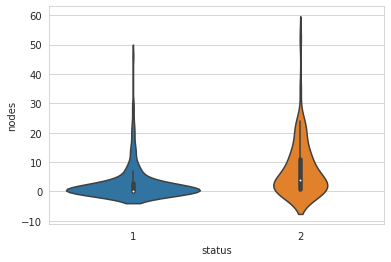

In [46]:
# visualize both pdf and boxplot of nodes using violin plot wrt status
sns.violinplot(x='status',y='nodes',data=breast_cancer)
plt.show()

* irrespective of patient survived or died,there are many patients with almost zero axillary nodes

* It also suggests that there are higher chances for survival with low nodes,as for the plot of status=1 is bulged  more near the lower values of nodes as compared to status=2 plot.

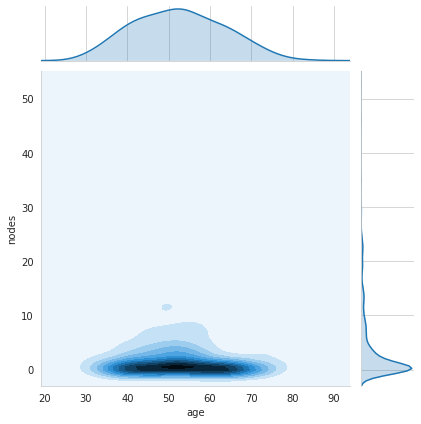

In [45]:
# analysing the age and nodes features for possible relationships existance
sns.jointplot(x='age',y='nodes',data=breast_cancer,kind='kde')
plt.show()

* most of the patients have less than 5 axillary nodes

* 95% of the patients age lie between 32 to 72 age (since age is roughly guassian distributed,which is clear in pdf plot of age,applying 68-95-99 rule)

In [22]:
# calculating the correlation between age and status
from scipy import stats
# lets see correlaton between age and patients status
# correaltion btween discrete and continuos features: refer : https://www.researchgate.net/post/Can_I_use_Pearsons_correlation_coefficient_to_know_the_relation_between_perception_and_gender_age_income#:~:text=For%20a%20dichotomous%20categorical%20variable,1%2Dcoding%20for%20the%20categories.&text=You%20should%20then%20use%20eta,variable%20and%20a%20continuous%20variable.
pointbiserial_coeffient = stats.pointbiserialr(breast_cancer['age'], breast_cancer['status'])
print(pointbiserial_coeffient)
spearman_coeffient = stats.spearmanr(breast_cancer['age'],breast_cancer['status'])
spearman_coeffient

PointbiserialrResult(correlation=0.067950324399104, pvalue=0.23595785126822735)


SpearmanrResult(correlation=0.05591412129628035, pvalue=0.32963096234037237)

* We see that both pearson and spearman  correlation are low almost low (0.068 and 0.056)

* also since p-value is higher than the thumb rule(0.05), **we accept the null hypothesis that the age and status are uncorrelated**

In [23]:
#lets see correlation between nodes and patients status
# diffrence between correlation and p-value : https://dataschool.com/fundamentals-of-analysis/correlation-and-p-value/#:~:text=The%20two%20most%20commonly%20used,an%20experiment%20is%20statistically%20significant.
pointbiserial_coeffient = stats.pointbiserialr(breast_cancer['nodes'], breast_cancer['status'])
print(pointbiserial_coeffient)
spearman_coeffient = stats.spearmanr(breast_cancer['nodes'],breast_cancer['status'])
spearman_coeffient


PointbiserialrResult(correlation=0.28676756711842083, pvalue=3.335385116659218e-07)


SpearmanrResult(correlation=0.3270808899002223, pvalue=4.625031416859101e-09)

* We see a good amount of linear(pearson) as well as monotonic(spearman) positive correlation

* since the p-values are less than thumb rule(0.05),  **we reject the null hypothesis(H0: the features are not correlated) and accept the altenative hypothesis (H1: the features have relationship)**

* **Hence number of nodes are positively related to the patient's status**,hence an important feature to consider for modelling

# Summary Of EDA

* when people are between 20-40 age there is slightly higher chance that the patient may survive

* when people are between 40-60 , the chances to survive more than 5 years is  less when compared to death within 5 years

* after age 60, the chances of survival also depends on other health aspects of the patient

* patients with 0-5(approx) nodes have a much greater probablity to survive for more than 5years

* As expected patients with more nodes are slightly higher probable to death within 5 years than compared with patients who survived longer years

* Among all the indepedent features analysis with respect to patient's survival status,I feel number of axillary nodes are much informative regarding classifying the patients based on survival status

* The probablity of survival of a patient is higher when the axillary node count is roughly between 0-25,after reaching node counts of 25 or higher,the chances of survival purely depends on the health conditions

* There is roughly 20% extra chance for a patient to survive if the age is below 45 when compared to chance of death within 5 years

* There are about 80% of patients who survived  and  have nodes <= 5

* 95% of the patients age lie between 32 to 72 age (since age is roughly guassian distributed,which is clear in pdf plot of age,applying 68-95-99 rule)

* Hence number of nodes are positively related to the patient's status,hence an important feature to consider for modelling
